## PS6 

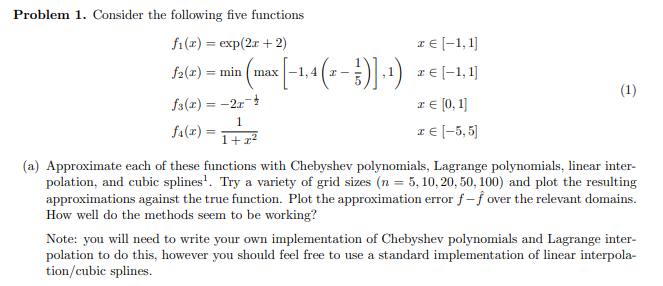

In [4]:
import numpy as np
from numpy.polynomial import chebyshev

In [5]:
#first we define all of the functions 

def f1(x): 
    return np.exp(2*x + 2)

def f2(x):
    return min(max(-1, 4 * (x - 1/5)), 1)

def f3(x):
    return -2*x**(-1/2)

def f4(x):
    return 1/(1+x**2) 



## Chebyshev function approximation 

The expression np.arange(n + 1, dtype=float) creates an array of n + 1 values, starting from 0 and ending at n. This array is then scaled by dividing it by n and multiplying it by π to give the angles in radians for each node. The expression np.cos(np.pi * np.arange(n + 1, dtype=float) / n) 


The chebyshev.chebfit function fits a Chebyshev series of a given degree to the data points (nodes, fvals). The degree of the Chebyshev series is specified by the argument n, which should be the same as the number of nodes n. The function returns an array of coefficients, starting with the coefficient of the highest degree term and ending with the constant term.

The approximation error over the relevant domain is the difference between the true function and its approximation. In this case, it is defined as f - f_approx. This represents how close the approximation is to the true function over the relevant domain. A small approximation error means that the approximation is a good fit to the true function over the relevant domain.

Max error for n =  5 is 0.04655446143654274
Max error for n =  10 is 8.105089754906203e-07
Max error for n =  20 is 2.4158453015843406e-13
Max error for n =  50 is 3.197442310920451e-13
Max error for n =  100 is 4.0545344859310717e-13


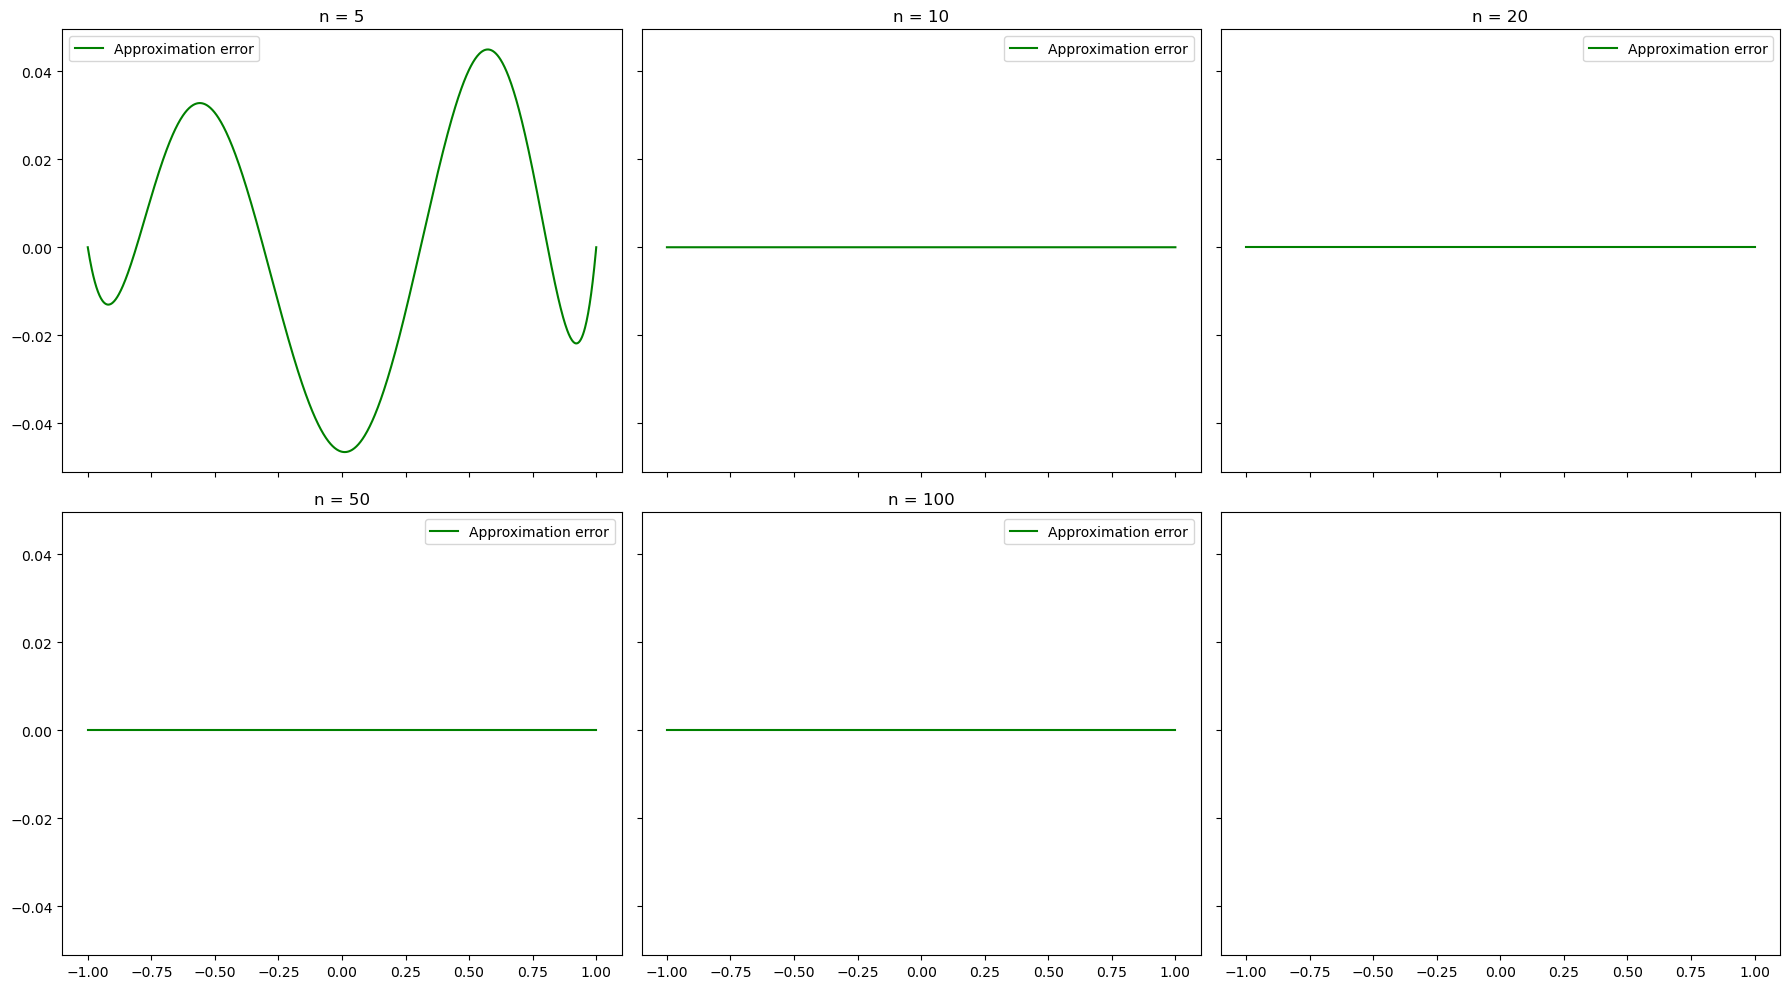

In [7]:
def chebyshev_nodes(n, a, b):
    '''The function returns an array of n + 1 nodes '''
    return 0.5 * (a + b) + 0.5 * (b - a) * np.cos(np.pi * np.arange(n + 1, dtype=float) / n)

n_values = [5, 10, 20, 50, 100]
# a, b = -1, 1
x = np.linspace(a, b, 1000)
y = f1(x)

def chebyshev_error_grapher(function,a = -1, b=1 ):
    n_values = [5, 10, 20, 50, 100]
    x = np.linspace(a, b, 1000) #domain 
    y = function(x) #true function evaluated in our domain 

    fig, ax = plt.subplots(2, 3, figsize=(18, 10), sharex=True, sharey=True)
    ax = ax.ravel()


    for i, n in enumerate(n_values):
        nodes = chebyshev_nodes(n, a, b)
        fvals = function(nodes)
        coefficients = chebyshev.chebfit(nodes, fvals, n)
        y_approx = chebyshev.chebval(x, coefficients)
        error = y - y_approx
        
        ax[i].plot(x, error, 'g', label='Approximation error')
        ax[i].legend()
        ax[i].set_title(f'n = {n}')
        #the errors are relatively small even if they do fluctuate.
        #  Thus maximum error might be a better to illustrate the error 
        max_error = np.abs(y - y_approx).max()
        print('Max error for n = ',n,'is', max_error)
        
        
    plt.tight_layout()
    plt.show()

chebyshev_error_grapher(f1)

Max error for n =  5 is 0.04655446143654274
Max error for n =  10 is 8.105089754906203e-07
Max error for n =  20 is 2.4158453015843406e-13
Max error for n =  50 is 3.197442310920451e-13
Max error for n =  100 is 4.0545344859310717e-13


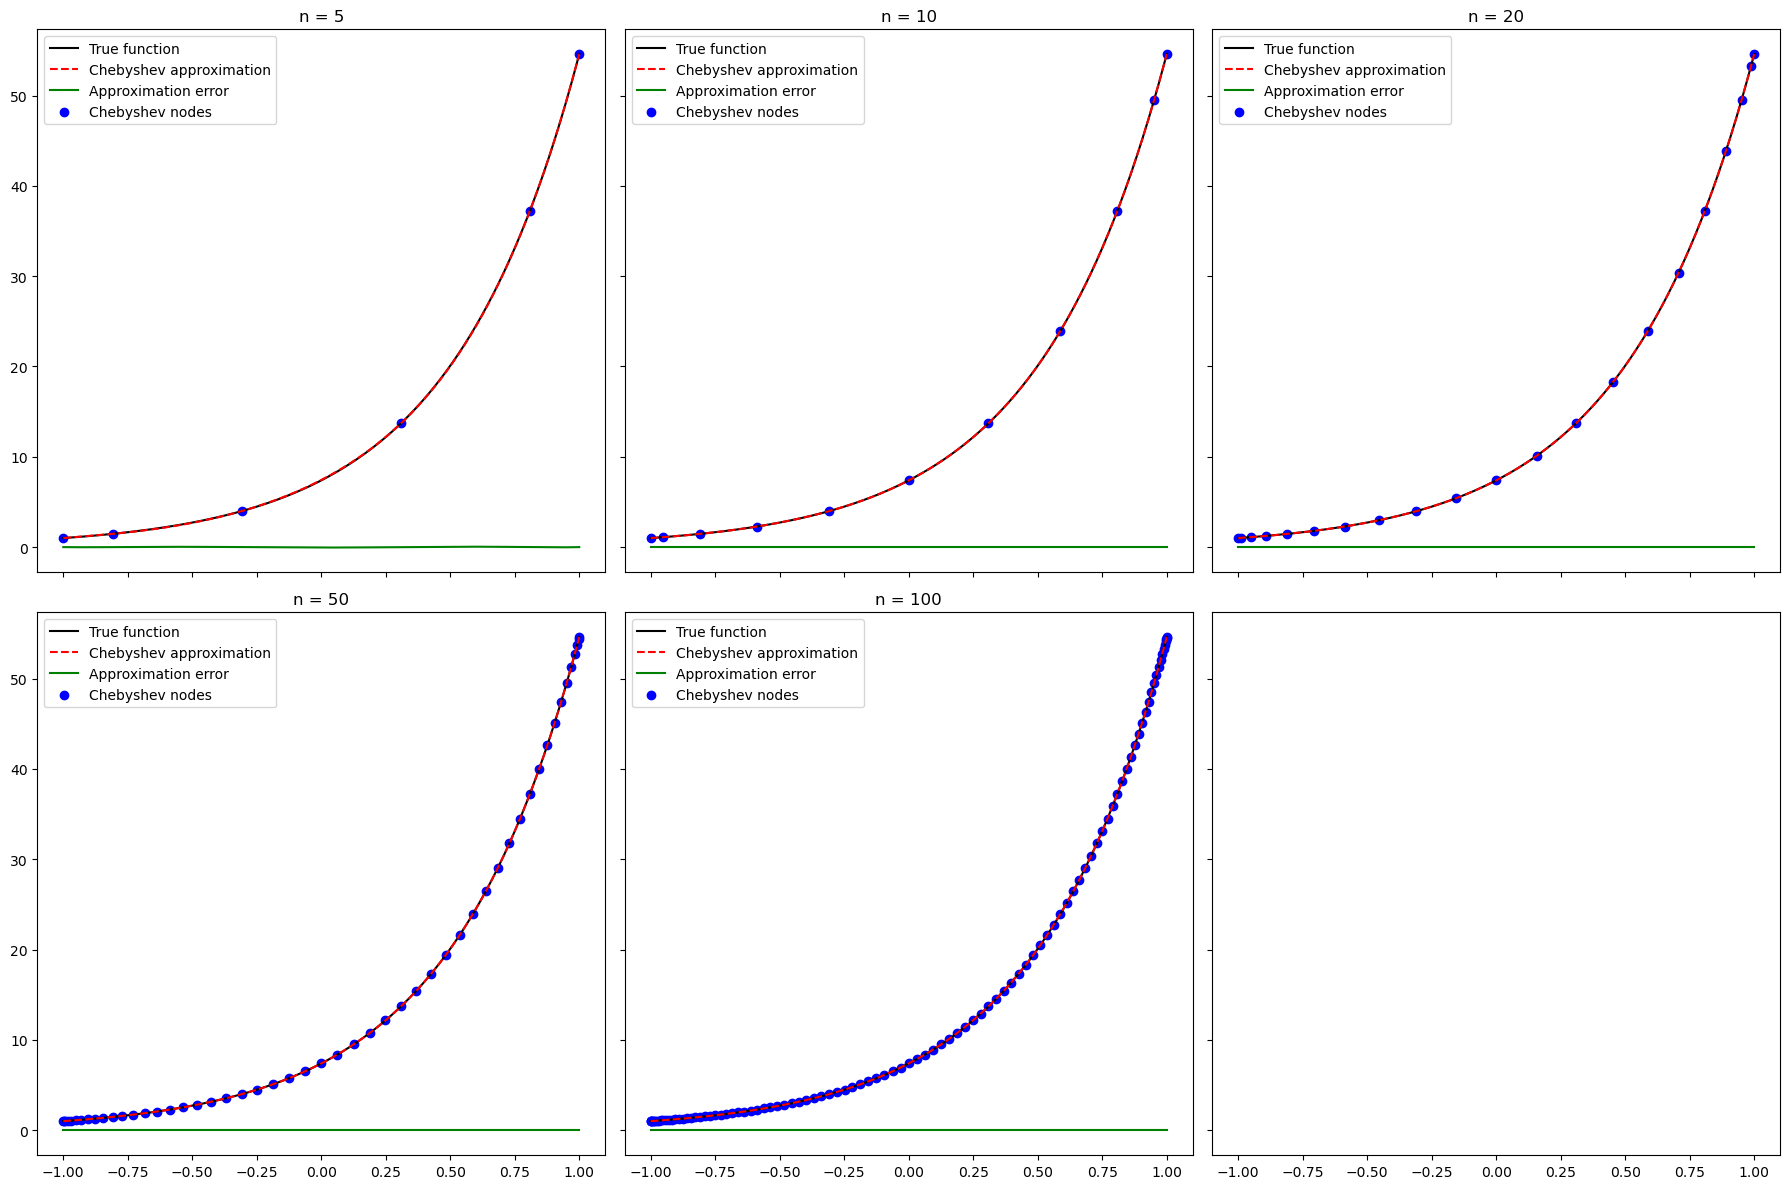

In [8]:
#combining the 2 


def chebyshev_grapher(function, a = -1, b = 1):
    #settings
    n_values = [5, 10, 20, 50, 100]
    x = np.linspace(a, b, 1000) # x domain 
    y = function(x) # true function evaluated 
    fig, ax = plt.subplots(2, 3, figsize=(18, 12), sharex=True, sharey=True)
    ax = ax.ravel()

    for i, n in enumerate(n_values): #i takes on the values 0, 1, 2, 3, 4, and n takes on the values 5, 10, 20, 50, and 100
        nodes = chebyshev_nodes(n, a, b)
        fvals = function(nodes) #function evaluated at nodes 
        coefficients = chebyshev.chebfit(nodes, fvals, n) #chebyshev coefficients 
        y_approx = chebyshev.chebval(x, coefficients) #chebyshev approximation i.e subs our coefficients into eqns (7) in the slides
        error = y - y_approx

        max_error = np.abs(y - y_approx).max()
        print('Max error for n = ',n,'is', max_error)


        ax[i].plot(x, y, 'k', label='True function')
        ax[i].plot(x, y_approx, 'r--', label='Chebyshev approximation')
        ax[i].plot(x, error, 'g', label='Approximation error')
        ax[i].scatter(nodes, fvals, color='blue', label='Chebyshev nodes')
        ax[i].legend()
        ax[i].set_title(f'n = {n}')
    plt.tight_layout()
    plt.show()
    
chebyshev_grapher(f1)   
#the errors are relatively small even if they do fluctuate.
#  Thus maximum error might be a better to illustrate the error 


## Lagrange function approximation 




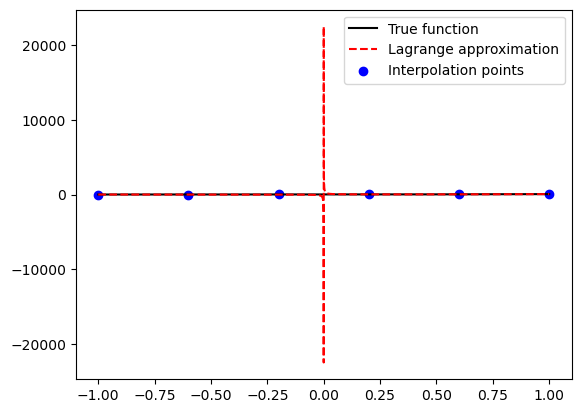

In [69]:

def f(x):
    """
    The function we want to approximate.
    """
    return np.exp(2 * x + 2)



# Define the set of n+1 points
a = -1 
b = 1
n = 5
x_values = np.linspace(a, b, n + 1) #interpolation points 
y_values = f(x_values) 

# Construct the Vandermonde matrix , input is the points we evaluate the lagrangian at 
V = np.vander(x_values, N=n + 1) 

# Solve for the Lagrange coefficients 
coefficients = np.linalg.solve(V, y_values)

def evaluate(a, x): # albert's code 
    return sum(a[s] * x**(s-1) for s in range(len(a)))

# Evaluate the Lagrange approximation on a dense grid
x = np.linspace(-1, 1, 10000)
y_approx = np.polyval(coefficients[::-1], x) #basically subs back 
#coeffcients array needs to be reversed,
#  as numpy.polyval expects the coefficients in increasing order of degree.
y_approx = evaluate(coefficients, x)

# Plot the true function and the approximation
plt.plot(x, f(x), 'k', label='True function')
plt.plot(x, y_approx, 'r--', label='Lagrange approximation')
plt.scatter(x_values, y_values, color='blue', label='Interpolation points')
plt.legend()
plt.show()

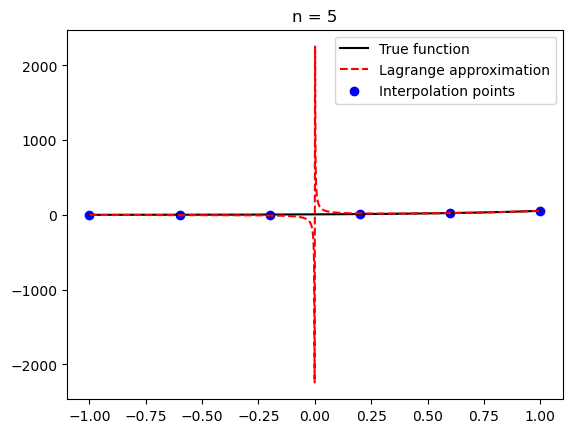

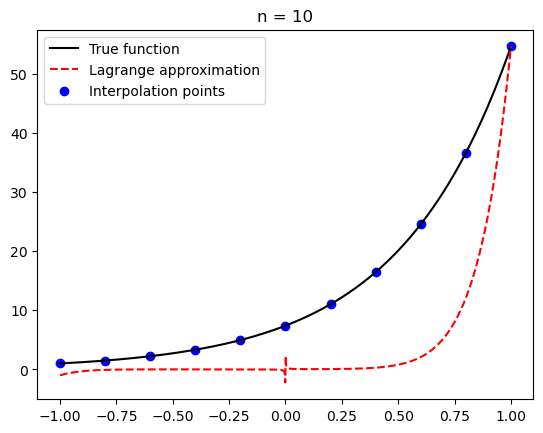

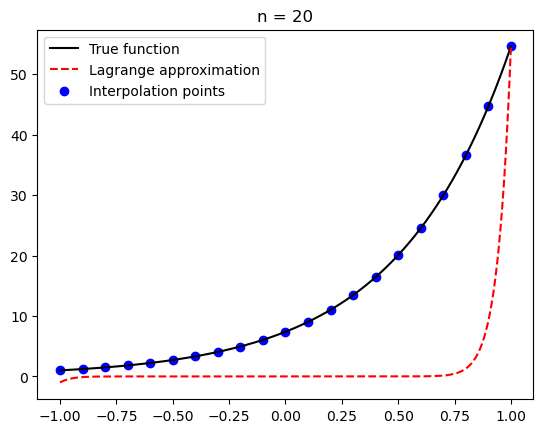

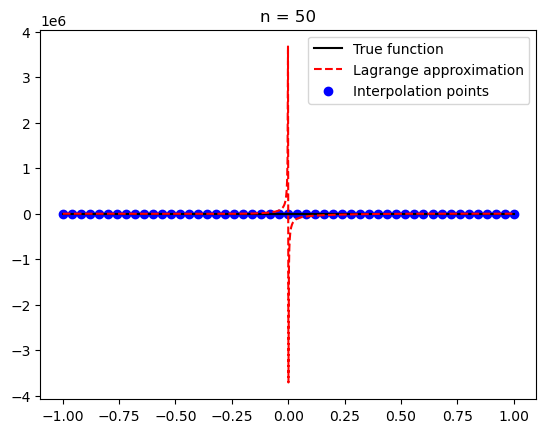

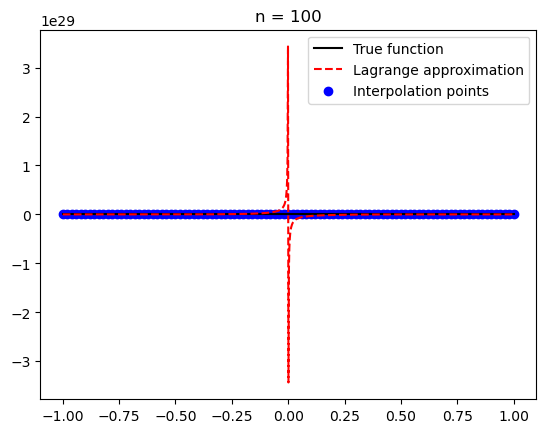

In [71]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    """
    The function we want to approximate.
    """
    return np.exp(2 * x + 2)

    
# def f(x):
#     return 1/(1+x**2) 


a = -1
b = 1

n_values = [5, 10, 20, 50, 100]

for n in n_values:
    # Define the set of n+1 points
    x_values = np.linspace(a, b, n + 1) #interpolation points 
    y_values = f(x_values) 

    # Construct the Vandermonde matrix , input is the points we evaluate the lagrangian at 
    V = np.vander(x_values, N=n + 1) 

    # Solve for the Lagrange coefficients 
    coefficients = np.linalg.solve(V, y_values)

    # Evaluate the Lagrange approximation on a dense grid
    x = np.linspace(a, b, 1000)
    y_approx = np.polyval(coefficients[::-1], x) #basically subs back 
    #coeffcients array needs to be reversed,
    #  as numpy.polyval expects the coefficients in increasing order of degree.
    y_approx = evaluate(coefficients, x)

    # Plot the true function and the approximation
    plt.plot(x, f(x), 'k', label='True function')
    plt.plot(x, y_approx, 'r--', label='Lagrange approximation')
    plt.scatter(x_values, y_values, color='blue', label='Interpolation points')
    plt.legend()
    plt.title(f"n = {n}")
    plt.show()

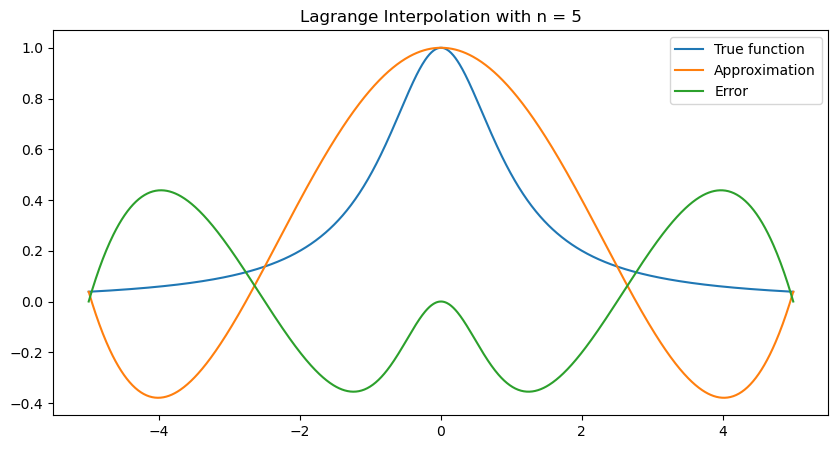

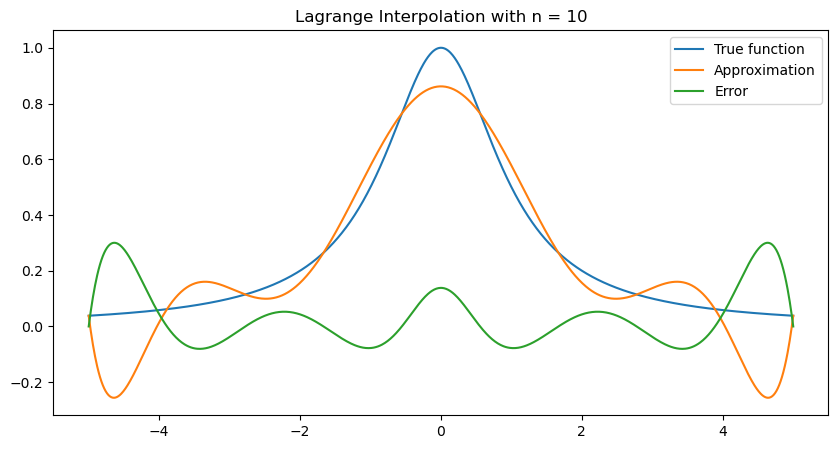

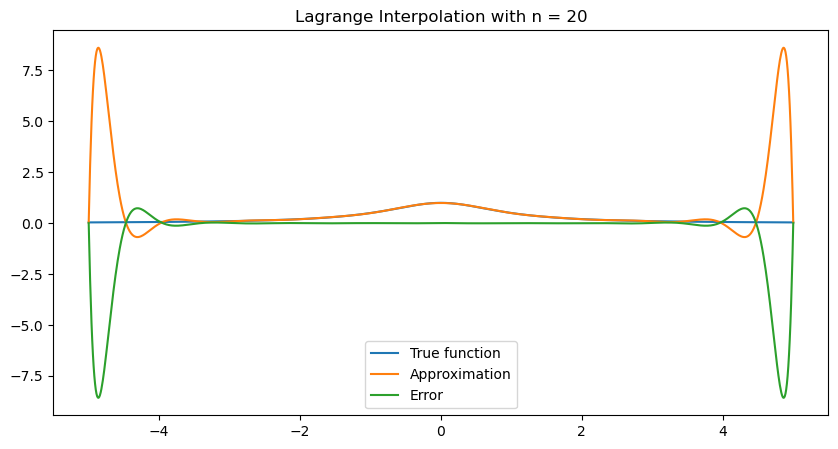

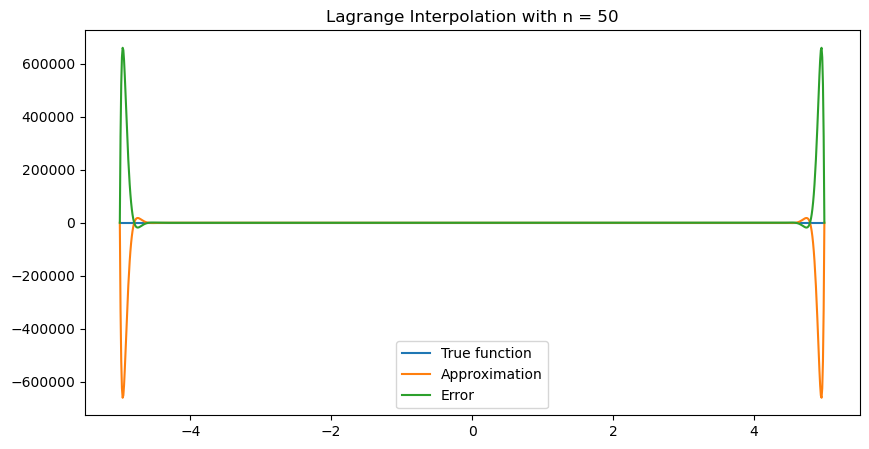

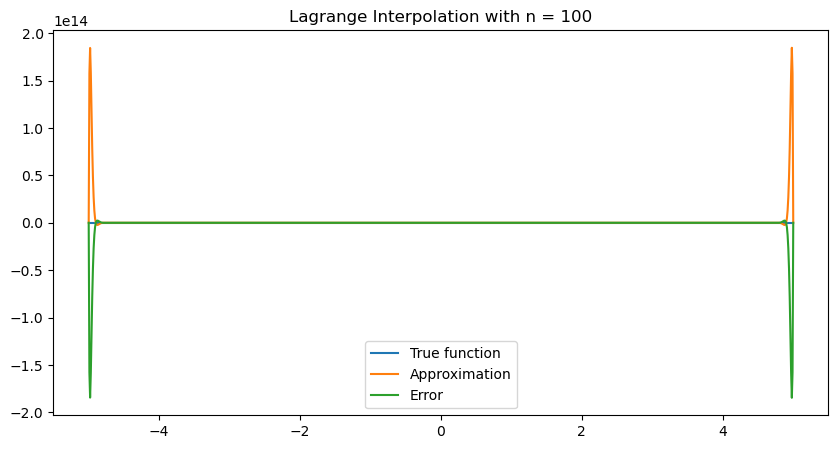

In [15]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return 1/(1 + x**2)

grid_sizes = [5, 10, 20, 50, 100]
x = np.linspace(-5, 5, 1000)
y = f(x)

for n in grid_sizes:
    x_vals = np.linspace(-5, 5, n)
    y_vals = f(x_vals)
    y_approx = [lagrange_interpolation(x_vals, y_vals, i) for i in x]
    error = y - y_approx
    
    plt.figure(figsize=(10,5))
    plt.title(f"Lagrange Interpolation with n = {n}")
    plt.plot(x, y, label="True function")
    plt.plot(x, y_approx, label="Approximation")
    plt.plot(x, error, label="Error")
    plt.legend()
    plt.show()

Max error for n =  5 is 0.4383497951290457
Max error for n =  10 is 0.30028454351755707
Max error for n =  20 is 8.57536082643985
Max error for n =  50 is 660564.9314023153
Max error for n =  100 is 184592774826518.06


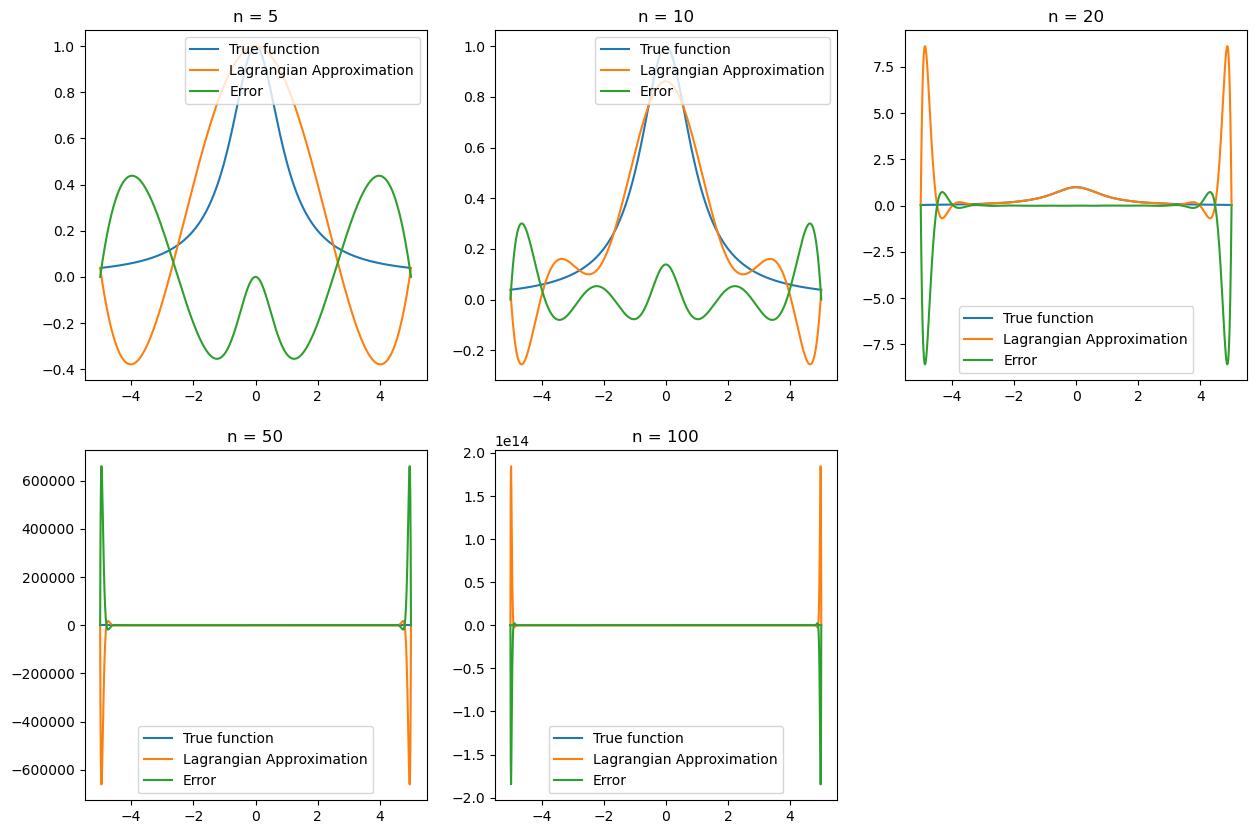

In [21]:
import numpy as np
import matplotlib.pyplot as plt

def f1(x):
    return 1/(1 + x**2)

def lagrange_interpolation(x_vals, y_vals, x):
    n = len(x_vals)
    result = 0
    for i in range(n):
        term = y_vals[i]
        for j in range(n):
            if j != i:
                term *= (x - x_vals[j])/(x_vals[i] - x_vals[j])
        result += term
    return result

def lagrange_grapher(func, a, b):
    grid_sizes = [5, 10, 20, 50, 100]
    x = np.linspace(a, b, 1000)
    y = func(x)
    plt.figure(figsize=(15, 10))

    for i, n in enumerate(grid_sizes):
        x_vals = np.linspace(a, b, n)
        y_vals = func(x_vals)
        y_approx = [lagrange_interpolation(x_vals, y_vals, i) for i in x]
        error = y - y_approx
        max_error = np.abs(y - y_approx).max()
        print('Max error for n = ',n,'is', max_error)
        
        plt.subplot(2, 3, i+1)
        plt.title(f"n = {n}")
        plt.plot(x, y, label="True function")
        plt.plot(x, y_approx, label="Lagrangian Approximation")
        plt.plot(x, error, label="Error")
        plt.legend()

    plt.show()

lagrange_grapher(f1,-5,5)
